<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/AboutData_practical_carDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[car dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/car/)



This code is intended for simple operations on the  dataset with pandas.It is my belief that this code needs to be reviewed and modified.A revision is needed as it was made in 2020.

In [ ]:
import numpy as np
# discover data and ETL

In [ ]:
# ----------------------------
# read and prepare dataset
# ----------------------------
'''
we can use this or we can use pandas directly
if we want use pandas we must convert dataset beforhand
'''

content_lines = []
with open("/content/drive/MyDrive/dataset/car.data", "r", encoding='utf-8') as content:
    for i,line in enumerate(content):
      if i < 5:
        print('sample of orginal data:',i,line)
      a = line.split(',') # how data splited
      a = line.strip('\n') # remove leading and trailing characters \n
      a = a.split(',')
      content_lines.append(a)




content_lines[:3]



sample of orginal data: 0 vhigh,vhigh,2,2,small,low,unacc

sample of orginal data: 1 vhigh,vhigh,2,2,small,med,unacc

sample of orginal data: 2 vhigh,vhigh,2,2,small,high,unacc

sample of orginal data: 3 vhigh,vhigh,2,2,med,low,unacc

sample of orginal data: 4 vhigh,vhigh,2,2,med,med,unacc



[['vhigh', 'vhigh', '2', '2', 'small', 'low', 'unacc'],
 ['vhigh', 'vhigh', '2', '2', 'small', 'med', 'unacc'],
 ['vhigh', 'vhigh', '2', '2', 'small', 'high', 'unacc']]

In [ ]:
# --------------
# create dataFrame
# --------------
import pandas as pd
df = pd.DataFrame(content_lines, columns = ('buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'))
print(df.dtypes, end = '\n ----------')
df.describe()

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object
 ----------

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:


df[df.isnull().any(axis = 1)]

# we dont have null members

,buying,maint,doors,persons,lug_boot,safety,class


In [ ]:
print(f'buying columns have these data\n {df.buying.value_counts()}',
      df['maint'].value_counts(),
      df['doors'].value_counts(),
      df['persons'].value_counts(),
      df['lug_boot'].value_counts(),
      df['safety'].value_counts(),
      df['class'].value_counts(), sep = '\n ############ \n')

buying columns have these data
 vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
 ############ 
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
 ############ 
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
 ############ 
2       576
4       576
more    576
Name: persons, dtype: int64
 ############ 
small    576
med      576
big      576
Name: lug_boot, dtype: int64
 ############ 
low     576
med     576
high    576
Name: safety, dtype: int64
 ############ 
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [ ]:
# replace
'''
change buying column from categorical data to numerical data
'''
a = { 'buying' :{'vhigh':1000, 'high': 500, 'med':250, 'low': 100}}
newdf = df.replace(a)
newdf.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1000,vhigh,2,2,small,low,unacc
1,1000,vhigh,2,2,small,med,unacc
2,1000,vhigh,2,2,small,high,unacc
3,1000,vhigh,2,2,med,low,unacc
4,1000,vhigh,2,2,med,med,unacc


In [ ]:
#  Label Encoding
# The nice aspect of this approach is that you get the benefits of pandas
# categories (compact data size, ability to order, plotting support) but
# can easily be converted to numeric values for further analysis.
#newdf['maint'] = newdf['maint'].astype('category')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
newdf['maint'] = label_encoder.fit_transform(newdf['maint'])
newdf

,buying,maint,doors,persons,lug_boot,safety,class
0,1000,3,2,2,small,low,unacc
1,1000,3,2,2,small,med,unacc
2,1000,3,2,2,small,high,unacc
3,1000,3,2,2,med,low,unacc
4,1000,3,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,100,1,5more,more,med,med,good
1724,100,1,5more,more,med,high,vgood
1725,100,1,5more,more,big,low,unacc
1726,100,1,5more,more,big,med,good


In [ ]:
# Ordinal encoding

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
newdf['buying'] = ord_enc.fit_transform(newdf[['buying']])
newdf

,buying,maint,doors,lug_boot,class,safety_high,safety_low,safety_med,"(2,)","(4,)","(more,)"
0,3.0,2,2,small,2.0,0,1,0,1.0,0.0,0.0
1,3.0,2,2,small,2.0,0,0,1,1.0,0.0,0.0
2,3.0,2,2,small,2.0,1,0,0,1.0,0.0,0.0
3,3.0,2,2,med,2.0,0,1,0,1.0,0.0,0.0
4,3.0,2,2,med,2.0,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1723,0.0,0,5more,med,1.0,0,0,1,0.0,0.0,1.0
1724,0.0,0,5more,med,3.0,1,0,0,0.0,0.0,1.0
1725,0.0,0,5more,big,2.0,0,1,0,0.0,0.0,1.0
1726,0.0,0,5more,big,1.0,0,0,1,0.0,0.0,1.0


In [ ]:
# ONE HOT Encoding
a = pd.get_dummies(df['buying'])
a = np.array(a)
print(a)

newdf = pd.get_dummies(newdf, columns = ['safety'])
newdf

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]]


,buying,maint,doors,persons,lug_boot,class,safety_high,safety_low,safety_med
0,1000,vhigh,2,2,small,2.0,0,1,0
1,1000,vhigh,2,2,small,2.0,0,0,1
2,1000,vhigh,2,2,small,2.0,1,0,0
3,1000,vhigh,2,2,med,2.0,0,1,0
4,1000,vhigh,2,2,med,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...
1723,100,low,5more,more,med,1.0,0,0,1
1724,100,low,5more,more,med,3.0,1,0,0
1725,100,low,5more,more,big,2.0,0,1,0
1726,100,low,5more,more,big,1.0,0,0,1


In [ ]:
# del a column from dataset

newdf = newdf.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
newdf = newdf.drop(['persons'], axis = 1)
newdf

,buying,maint,doors,lug_boot,class,safety_high,safety_low,safety_med,"(2,)","(4,)","(more,)"
0,1000,vhigh,2,small,2.0,0,1,0,1.0,0.0,0.0
1,1000,vhigh,2,small,2.0,0,0,1,1.0,0.0,0.0
2,1000,vhigh,2,small,2.0,1,0,0,1.0,0.0,0.0
3,1000,vhigh,2,med,2.0,0,1,0,1.0,0.0,0.0
4,1000,vhigh,2,med,2.0,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1723,100,low,5more,med,1.0,0,0,1,0.0,0.0,1.0
1724,100,low,5more,med,3.0,1,0,0,0.0,0.0,1.0
1725,100,low,5more,big,2.0,0,1,0,0.0,0.0,1.0
1726,100,low,5more,big,1.0,0,0,1,0.0,0.0,1.0


In [ ]:
# Custom Encoding
'''
it's checking if the values in the 'maint' column contain the substring 'vhigh'.
 If they do, it assigns the value 2 to those rows; otherwise, it assigns the value 0.
'''
newdf['maint'] = np.where(newdf['maint'].str.contains('vhigh'),2,0)
newdf

,buying,maint,doors,lug_boot,class,safety_high,safety_low,safety_med,"(2,)","(4,)","(more,)"
0,1000,2,2,small,2.0,0,1,0,1.0,0.0,0.0
1,1000,2,2,small,2.0,0,0,1,1.0,0.0,0.0
2,1000,2,2,small,2.0,1,0,0,1.0,0.0,0.0
3,1000,2,2,med,2.0,0,1,0,1.0,0.0,0.0
4,1000,2,2,med,2.0,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1723,100,0,5more,med,1.0,0,0,1,0.0,0.0,1.0
1724,100,0,5more,med,3.0,1,0,0,0.0,0.0,1.0
1725,100,0,5more,big,2.0,0,1,0,0.0,0.0,1.0
1726,100,0,5more,big,1.0,0,0,1,0.0,0.0,1.0


In [ ]:
# Select dtypes
#
print(newdf.dtypes)
newdf2 = newdf.select_dtypes(include=['uint8'])
newdf2

buying           int64
maint            int64
doors           object
lug_boot        object
class          float64
safety_high      uint8
safety_low       uint8
safety_med       uint8
(2,)           float64
(4,)           float64
(more,)        float64
dtype: object


,safety_high,safety_low,safety_med
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
1723,0,0,1
1724,1,0,0
1725,0,1,0
1726,0,0,1


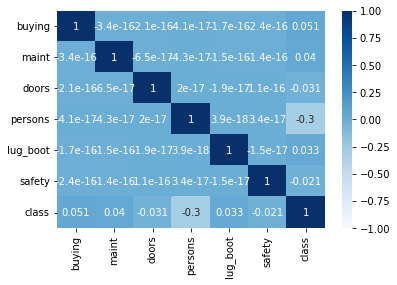

In [ ]:
# Find Correlations between colomns

corr = df.corr()
corrplot = sb.heatmap(corr, annot = True, cmap='Blues', xticklabels = corr.columns,
                      yticklabels = corr.columns, vmin = -1, vmax = +1)

----------


to be continued ...

↓ stuff ↓

In [ ]:
# Ordinal encoding

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df['buying'] = ord_enc.fit_transform(df[['buying']])
df['maint'] = ord_enc.fit_transform(df[['maint']])
df['doors'] = ord_enc.fit_transform(df[['doors']])
df['persons'] = ord_enc.fit_transform(df[['persons']])
df['lug_boot'] = ord_enc.fit_transform(df[['lug_boot']])
df['safety'] = ord_enc.fit_transform(df[['safety']])
df['class'] = ord_enc.fit_transform(df[['class']])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
a = df.columns
for i in range(len(a)):
  print(str(a[i]))
  df2[str(a[i])] = ord_enc.fit_transform(df2[str(a[i])])


df2

buying


ValueError: ignored

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
sb.pairplot(df)

plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(newdf[["persons"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)

,2,4,more
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1723,0.0,0.0,1.0
1724,0.0,0.0,1.0
1725,0.0,0.0,1.0
1726,0.0,0.0,1.0
